In [1]:
import pickle

In [2]:
#TODO: a bit broken! didnt index properly essay ids. but got an always 3 predictor anyhow
all_answers = [] 
all_questions = [] 
all_essays = [] 
suffix ='_ft_ada'
all_answers.extend(pickle.load(open(f'answer_dump{suffix}.pckl','rb')))
all_questions.extend(pickle.load(open(f'questions_dump{suffix}.pckl','rb')))
all_essays.extend(pickle.load(open(f'essays_dump{suffix}.pckl','rb')))
"""
for i in range(3):
    suffix = str(i+1)
    if i == 0:
        suffix = ''
    all_answers.extend(pickle.load(open(f'answer_dump{suffix}.pckl','rb')))
    all_questions.extend(pickle.load(open(f'questions_dump{suffix}.pckl','rb')))
    all_essays.extend(pickle.load(open(f'essays_dump{suffix}.pckl','rb')))
"""

FileNotFoundError: [Errno 2] No such file or directory: 'answer_dump_ft_ada.pckl'

In [ ]:
essay_str_list = [int(e[0][:-5][-2:]) for e in all_essays]

In [ ]:
all_answers

[(0,
  0,
  'Given is a student essay and a question to the essay. Please rate the Question with a number between 0 and 3, where 0 is "not at all satisfied" and 3 is "very satisfied.".\n\nEssay: """\nThe Cage\nIt felt like I was walking forever, i didn\'t even know were i was i just knew i was somewhere. A creepy aliway to be exazaced. To be honest i would rather\nbe at school than this nightmare well not to brag but i was not scared in the slightited, anyway desided just to keep walking to see what was down this\naliway, just as i was almost there thunder shot right though the sky it was like someone had a shotgun shot a bullet right next to my ear jezz i was not\nprepared for that, where there is thunder there is rain and i was not gonna get my new guchi shoes wet so i bulted to the end of the crusty aliway,\ni saw... well i didn\'t see anything other than cages, well i guess it was just a dream cause i don\'t own\nguchi shoes. OK enough of me being broke I gotta get to school. Time 

In [ ]:
all_parsed_answers = []
for a in all_answers:
    essat_id = essay_str_list[a[0]]
    #print('hi', essat_id)
    #print(a[1],all_questions[a[1]])
    #print(marked_essays[marked_essays['essay id']==essat_id].iloc[0][1+a[1]], a[3]['choices'][0]['text'])
    all_parsed_answers.append((a[0],a[1],int(marked_essays[marked_essays['essay id']==essat_id].iloc[0][1+a[1]]), int(a[3]['choices'][0]['text'][:2])))
    #print(essat_id, marked_essays[marked_essays['essay id']==essat_id][0])
    #break

In [ ]:
differences = [abs(a[-2]-a[-1]) for a in all_parsed_answers]

In [ ]:
from matplotlib import pyplot as plt

(array([123.,   0.,   0.,  61.,   0.,   0.,  10.,   0.,   0.,   1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

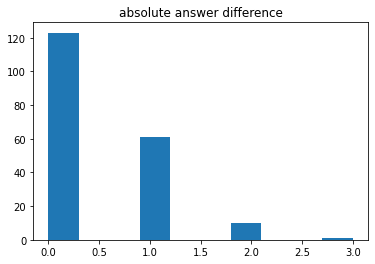

In [ ]:
plt.title('absolute answer difference')
plt.hist(differences)

In [ ]:
accumulated_variances_essays_list = {k:[] for k in range(52)}
for a in all_parsed_answers:
    accumulated_variances_essays_list[a[0]].append(abs(a[-2]-a[-1]))

In [ ]:
import numpy as np

(array([ 24.,   0.,   0.,   0.,   0.,   0.,  48.,   0.,   0., 930.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

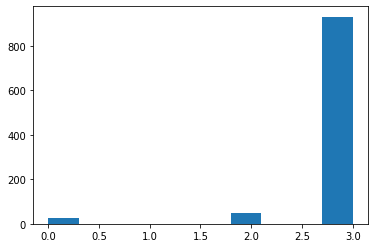

In [ ]:
plt.hist([int(a[3]['choices'][0]['text'][:2]) for a in all_answers])

In [ ]:
len(all_answers)

1002

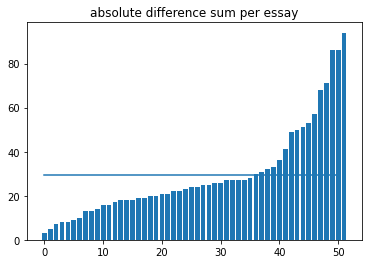

In [ ]:
plt.title('absolute difference sum per essay')
plt.bar(list(range(52)), sorted([sum(a) for a in accumulated_variances_essays_list.values()]))
plt.plot([0,50],[np.average([sum(a) for a in accumulated_variances_essays_list.values()])]*2)

In [ ]:
sorted_sum_list = sorted(enumerate([sum(a) for a in accumulated_variances_essays_list.values()]), key = lambda x: x[1])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f14edee7dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f14edef43a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f14edee7af0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f14edef4940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f14edef4c10>,
 'means': []}

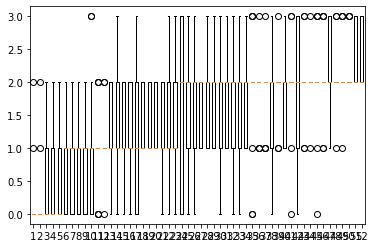

In [ ]:
plt.boxplot([list(accumulated_variances_essays_list.values())[s[0]] for s in sorted_sum_list])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f14edb92670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f14edb92c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f14edb924c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f14edb9f1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f14edb9f4c0>],
 'means': []}

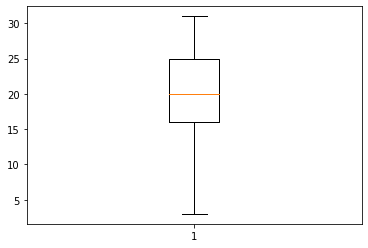

In [ ]:
plt.boxplot([sum(s) for s in accumulated_variances_essays_list.values()])

In [ ]:
current = -1 #questionid
accumulated_variances_list = {k:[] for k in range(13)}

for a in all_parsed_answers:
    accumulated_variances_list[a[1]].append(abs(a[-2]-a[-1]))

<BarContainer object of 13 artists>

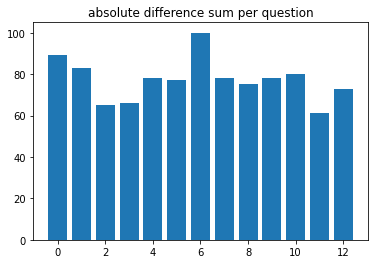

In [ ]:
plt.title('absolute difference sum per question')
plt.bar(list(range(13)), [sum(accumulated_variances_list[k]) for k in accumulated_variances_list])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f14edae7070>,
 'caps': [<matplotlib.lines.Line2D at 0x7f14edae7610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f14edad7e80>,
 'medians': [<matplotlib.lines.Line2D at 0x7f14edae7bb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f14edae7e80>,
 'means': []}

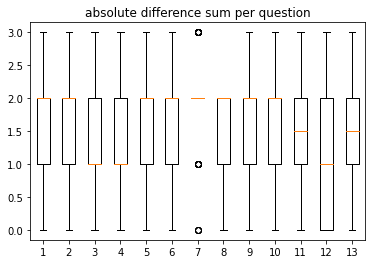

In [ ]:
plt.title('absolute difference sum per question')
plt.boxplot([accumulated_variances_list[k] for k in accumulated_variances_list])